In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
df=pd.read_csv('F:\capstone-project\datasets\DataCoSupplyChainDataset.csv',encoding='Latin1')
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [4]:
data=df.copy()

In [5]:
print("The dataset has ",df.shape[0]," rows and ",df.shape[1]," columns")

The dataset has  180519  rows and  53  columns


In [6]:
print("The number of duplicated rows is ",df.duplicated().sum())

The number of duplicated rows is  0


* There are no duplicated rows

#### Checking for null values

In [7]:
df.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


* Customer Zipcode: 3 missing values.
* Order Zipcode: 155,679 missing values; not critical due to other location features.
* Product Description: All values are missing; drop the column.
* Customer LName: 8 missing values; not significant since Customer Id is used.
* All other columns have no missing values.

In [8]:
df['Order Status'].value_counts()

Order Status
COMPLETE           59491
PENDING_PAYMENT    39832
PROCESSING         21902
PENDING            20227
CLOSED             19616
ON_HOLD             9804
SUSPECTED_FRAUD     4062
CANCELED            3692
PAYMENT_REVIEW      1893
Name: count, dtype: int64

In [9]:
#### Dropping down the below columns as they are null values and irrelevant information

In [10]:
df.drop("Order Zipcode",axis=1,inplace=True)
df.drop("Product Description",axis=1,inplace=True)
df.drop("Customer Email",axis=1,inplace=True)
df.drop("Customer Password",axis=1,inplace=True)
df.drop("Product Image", axis=1,inplace=True)

In [11]:
df.shape

(180519, 48)

In [12]:
df['Late_delivery_risk'].value_counts()

Late_delivery_risk
1    98977
0    81542
Name: count, dtype: int64

In [13]:
## changing the late delivery risk column to categorical.
df['Late_delivery_risk']=df['Late_delivery_risk'].astype('object')

In [14]:
df['Late_delivery_risk'].value_counts()

Late_delivery_risk
1    98977
0    81542
Name: count, dtype: int64

In [15]:
#### order id is also not relevant
## hence removing it 

In [16]:
df.drop("Order Id", axis=1,inplace=True)

In [17]:
df.shape

(180519, 47)

In [18]:
## dropping the latitude and longitude column
df.drop("Latitude", axis=1,inplace=True)
df.drop("Longitude",axis=1,inplace=True)

In [19]:
df.shape

(180519, 45)

In [20]:
##### dropping the product status column it has only value 0 for all entries
df.drop("Product Status",axis=1,inplace=True)

In [21]:
df.shape

(180519, 44)

In [22]:
###### Changing the data columns to datatime format
df["order date (DateOrders)"]=pd.to_datetime(df["order date (DateOrders)"])
df["shipping date (DateOrders)"]=pd.to_datetime(df["shipping date (DateOrders)"])
df=df.sort_values(by="order date (DateOrders)")

In [23]:
df.drop("shipping date (DateOrders)",axis=1,inplace=True)
df.shape

(180519, 43)

In [24]:
### Extracting weekday from order_date
df['order weekday']=df['order date (DateOrders)'].dt.weekday
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Shipping Mode,order weekday
33833,CASH,2,4,88.790001,239.979996,Advance shipping,0,43,Camping & Hiking,Hickory,...,88.790001,Central America,Distrito Federal,CLOSED,957,43,Diamondback Women's Serene Classic Comfort Bi,299.980011,Standard Class,3
77011,PAYMENT,3,4,91.180000,193.990005,Advance shipping,0,48,Water Sports,Chicago,...,91.180000,South America,Risaralda,PENDING_PAYMENT,1073,48,Pelican Sunstream 100 Kayak,199.990005,Standard Class,3
109322,PAYMENT,3,4,68.250000,227.500000,Advance shipping,0,24,Women's Apparel,Chicago,...,68.250000,South America,Risaralda,PENDING_PAYMENT,502,24,Nike Men's Dri-FIT Victory Golf Polo,50.000000,Standard Class,3
87884,PAYMENT,3,4,36.470001,107.889999,Advance shipping,0,18,Men's Footwear,Chicago,...,36.470001,South America,Risaralda,PENDING_PAYMENT,403,18,Nike Men's CJ Elite 2 TD Football Cleat,129.990005,Standard Class,3
114915,CASH,5,4,33.590000,159.940002,Late delivery,1,46,Indoor/Outdoor Games,San Antonio,...,33.590000,South America,Risaralda,CLOSED,1014,46,O'Brien Men's Neoprene Life Vest,49.980000,Standard Class,3


In [25]:
df['order weekday'].replace({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'},inplace=True)

#### let us separate the numerical and categorical variable for further analysis

In [26]:
num=df.select_dtypes(include='number').columns.to_list()
num

['Days for shipping (real)',
 'Days for shipment (scheduled)',
 'Benefit per order',
 'Sales per customer',
 'Category Id',
 'Customer Id',
 'Customer Zipcode',
 'Department Id',
 'Order Customer Id',
 'Order Item Cardprod Id',
 'Order Item Discount',
 'Order Item Discount Rate',
 'Order Item Id',
 'Order Item Product Price',
 'Order Item Profit Ratio',
 'Order Item Quantity',
 'Sales',
 'Order Item Total',
 'Order Profit Per Order',
 'Product Card Id',
 'Product Category Id',
 'Product Price']

In [27]:
## removing the id columns  and zipcode for univariate analysis
num=['Days for shipping (real)',
 'Order Item Discount',
 'Order Item Discount Rate',
 'Order Item Product Price',
 'Order Item Profit Ratio',
 'Order Item Quantity',
 'Sales',
 'Order Item Total',
 'Order Profit Per Order',
 'Product Price']

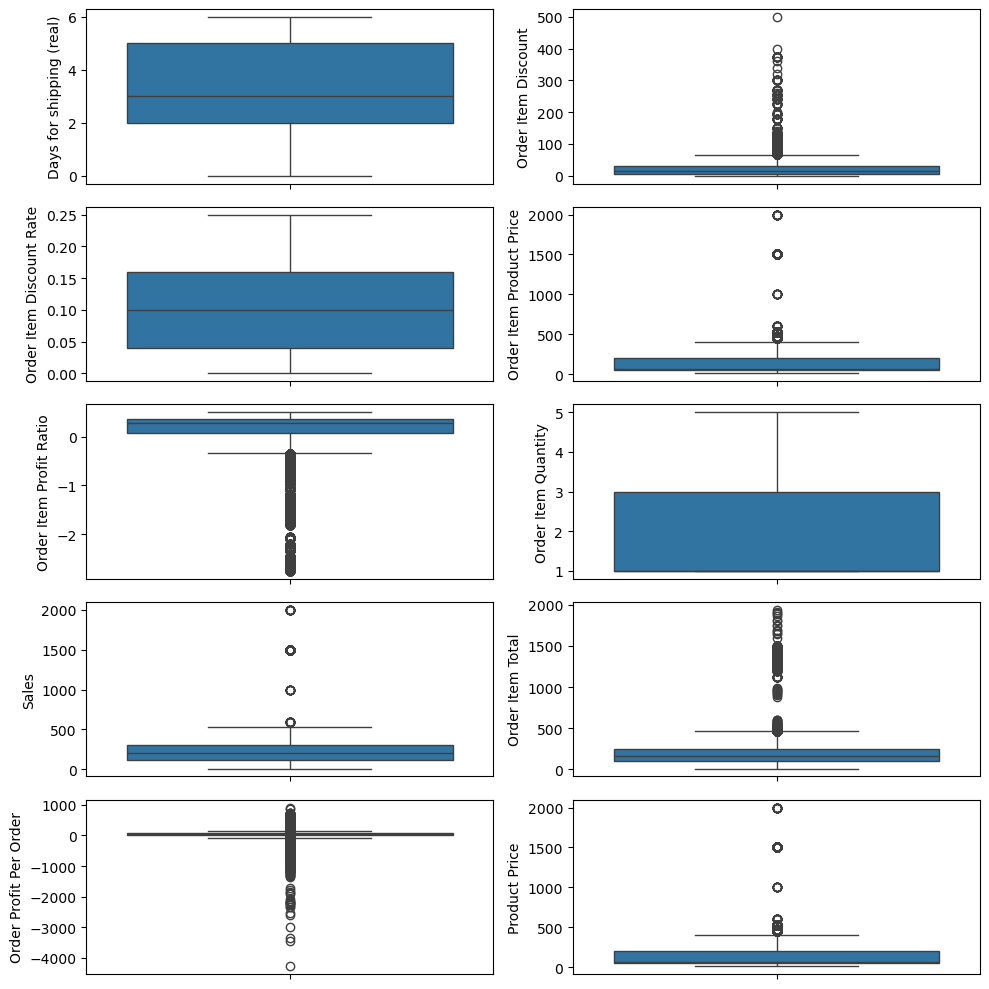

In [28]:
t=1
for i in num:
    plt.rcParams['figure.figsize']=[10,10]
    plt.subplot(5,2,t)
    sns.boxplot(df[i])
    t+=1
plt.tight_layout()
plt.show()

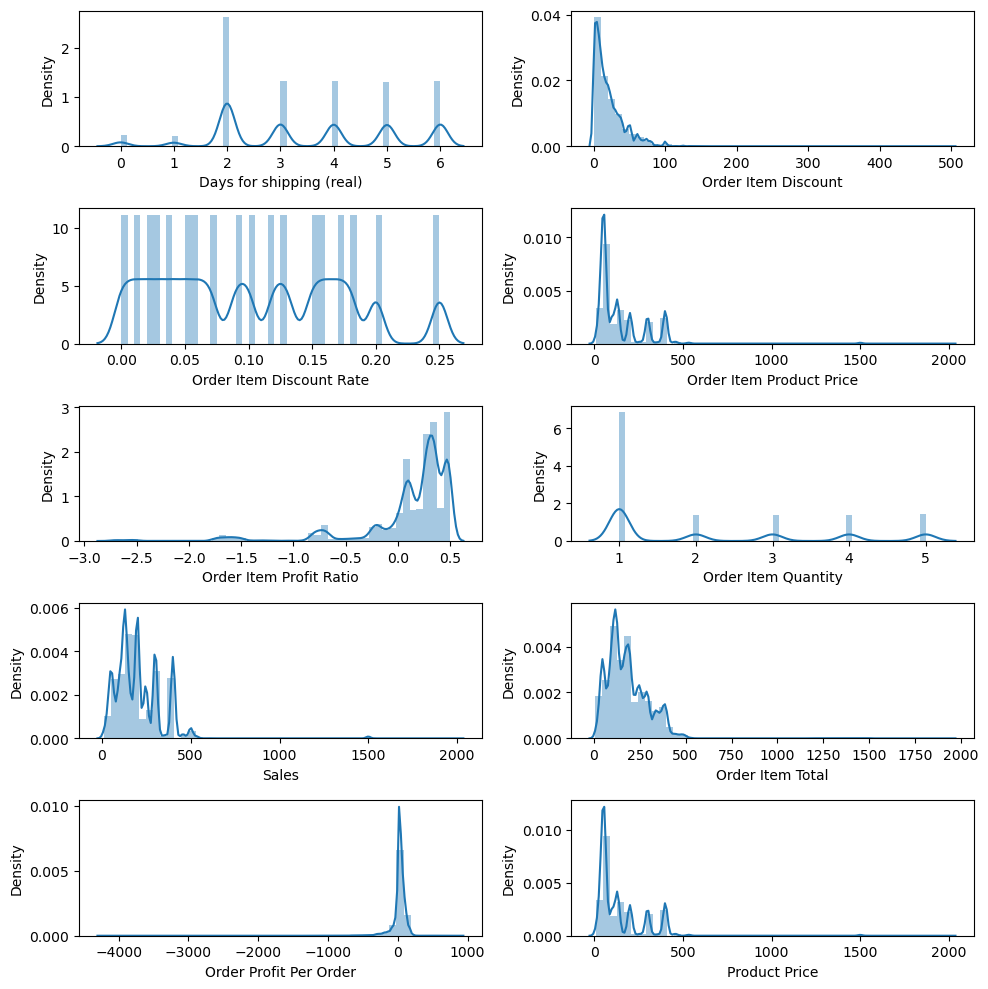

In [29]:
t=1
for i in num:
    plt.rcParams['figure.figsize']=[10,10]
    plt.subplot(5,2,t)
    sns.distplot(df[i])
    t+=1
plt.tight_layout()
plt.show()

In [30]:
cat=df.select_dtypes(include='object').columns.to_list()
cat

['Type',
 'Delivery Status',
 'Late_delivery_risk',
 'Category Name',
 'Customer City',
 'Customer Country',
 'Customer Fname',
 'Customer Lname',
 'Customer Segment',
 'Customer State',
 'Customer Street',
 'Department Name',
 'Market',
 'Order City',
 'Order Country',
 'Order Region',
 'Order State',
 'Order Status',
 'Product Name',
 'Shipping Mode',
 'order weekday']

In [31]:
### removing the customer Fname, customer lname for univariate analysis
cat=['Type',
 'Delivery Status',
 'Late_delivery_risk',
 'Category Name',
 'Customer City',
 'Customer Country',
 'Customer Segment',
 'Customer State',
 'Customer Street',
 'Department Name',
 'Market',
 'Order City',
 'Order Country',
 'Order Region',
 'Order State',
 'Order Status',
 'Product Name',
 'Shipping Mode',
 'order weekday']

In [32]:
cat

['Type',
 'Delivery Status',
 'Late_delivery_risk',
 'Category Name',
 'Customer City',
 'Customer Country',
 'Customer Segment',
 'Customer State',
 'Customer Street',
 'Department Name',
 'Market',
 'Order City',
 'Order Country',
 'Order Region',
 'Order State',
 'Order Status',
 'Product Name',
 'Shipping Mode',
 'order weekday']

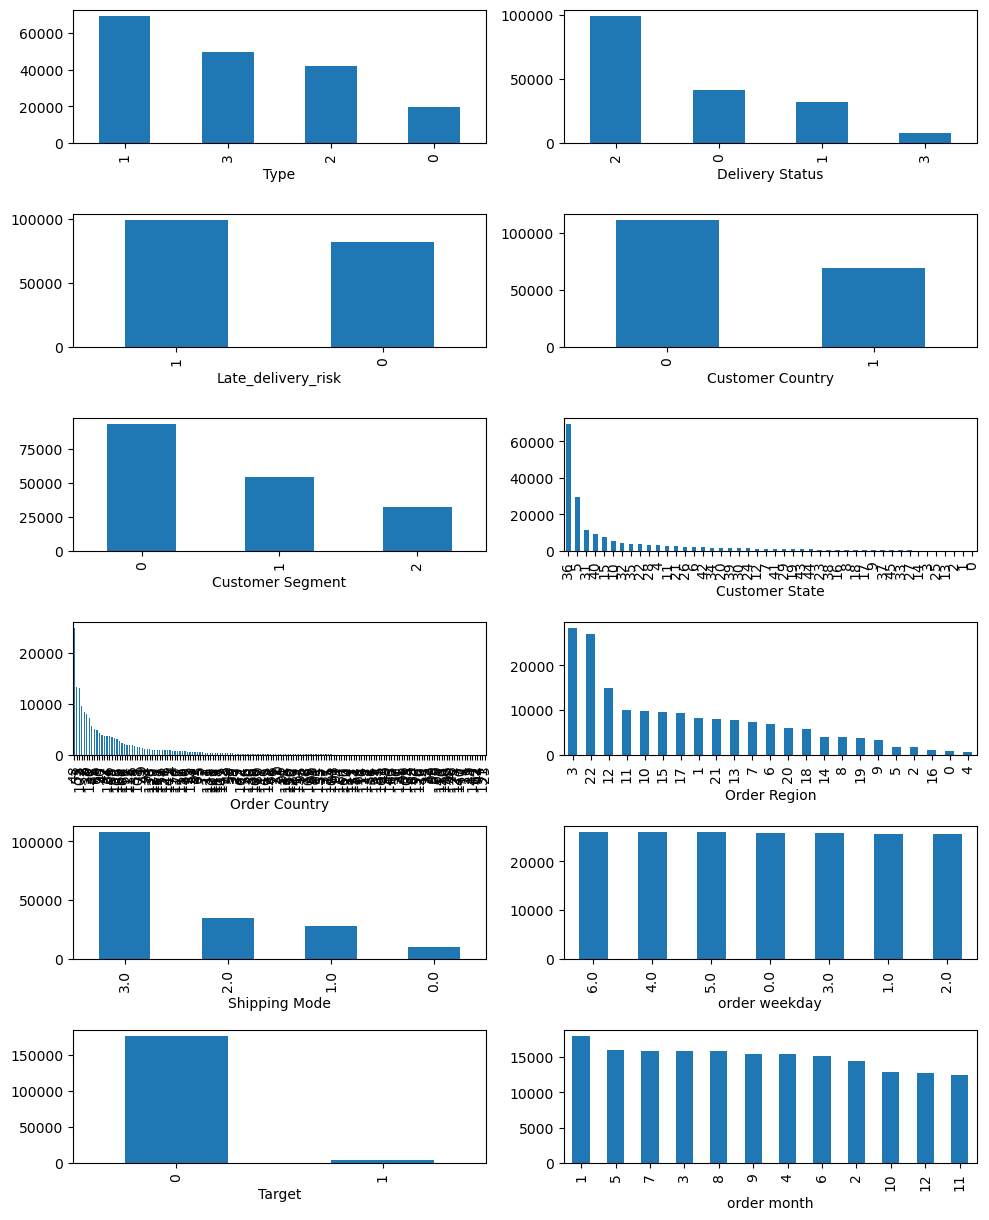

In [146]:
plt.figure(figsize=(10,20))
t=1
for i in cat:
    plt.subplot(10,2,t)
    df[i].value_counts().plot(kind='bar')
    t+=1
plt.tight_layout()
plt.show()

In [34]:
df.shape

(180519, 44)

In [35]:
df.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Category Id,Customer Id,Customer Zipcode,Department Id,Order Customer Id,order date (DateOrders),...,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Card Id,Product Category Id,Product Price
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,180519,...,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000
mean,3.497654,2.931847,21.974989,183.107609,31.851451,6691.379495,35921.126914,5.443460,6691.379495,2016-06-12 17:47:04.669868544,...,90260.000000,141.232550,0.120647,2.127638,203.772096,183.107609,21.974989,692.509764,31.851451,141.232550
min,0.000000,0.000000,-4274.979980,7.490000,2.000000,1.000000,603.000000,2.000000,1.000000,2015-01-01 00:00:00,...,1.000000,9.990000,-2.750000,1.000000,9.990000,7.490000,-4274.979980,19.000000,2.000000,9.990000
25%,2.000000,2.000000,7.000000,104.379997,18.000000,3258.500000,725.000000,4.000000,3258.500000,2015-09-21 13:49:00,...,45130.500000,50.000000,0.080000,1.000000,119.980003,104.379997,7.000000,403.000000,18.000000,50.000000
50%,3.000000,4.000000,31.520000,163.990005,29.000000,6457.000000,19380.000000,5.000000,6457.000000,2016-06-11 13:06:00,...,90260.000000,59.990002,0.270000,1.000000,199.919998,163.990005,31.520000,627.000000,29.000000,59.990002
75%,5.000000,4.000000,64.800003,247.399994,45.000000,9779.000000,78207.000000,7.000000,9779.000000,2017-03-01 08:42:00,...,135389.500000,199.990005,0.360000,3.000000,299.950012,247.399994,64.800003,1004.000000,45.000000,199.990005
max,6.000000,4.000000,911.799988,1939.989990,76.000000,20757.000000,99205.000000,12.000000,20757.000000,2018-01-31 23:38:00,...,180519.000000,1999.989990,0.500000,5.000000,1999.989990,1939.989990,911.799988,1363.000000,76.000000,1999.989990
std,1.623722,1.374449,104.433526,120.043670,15.640064,4162.918106,37542.461122,1.629246,4162.918106,NaN,...,52111.490959,139.732492,0.466796,1.453451,132.273077,120.043670,104.433526,336.446807,15.640064,139.732492


In [36]:
df.describe(include='object')

,Type,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Fname,Customer Lname,Customer Segment,Customer State,...,Department Name,Market,Order City,Order Country,Order Region,Order State,Order Status,Product Name,Shipping Mode,order weekday
count,180519,180519,180519,180519,180519,180519,180519,180511,180519,180519,...,180519,180519,180519,180519,180519,180519,180519,180519,180519,180519
unique,4,4,2,50,563,2,782,1109,3,46,...,11,5,3597,164,23,1089,9,118,4,7
top,DEBIT,Late delivery,1,Cleats,Caguas,EE. UU.,Mary,Smith,Consumer,PR,...,Fan Shop,LATAM,Santo Domingo,Estados Unidos,Central America,Inglaterra,COMPLETE,Perfect Fitness Perfect Rip Deck,Standard Class,Sunday
freq,69295,98977,98977,24551,66770,111146,65150,64104,93504,69373,...,66861,51594,2211,24840,28341,6722,59491,24515,107752,25946


In [37]:
def set_target(x):
    df['Target'] = 0
    conditions = [
        (df[x]  == 'SUSPECTED_FRAUD') 
        ]
    # create a list of the values we want to assign for each condition
    values = [1]

    # create a new column and use np.select to assign values to it using our lists as arguments
    df['Target'] = np.select(conditions, values)
    return df

In [38]:
x                  =     'Order Status'
set_target(x)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Shipping Mode,order weekday,Target
33833,CASH,2,4,88.790001,239.979996,Advance shipping,0,43,Camping & Hiking,Hickory,...,Central America,Distrito Federal,CLOSED,957,43,Diamondback Women's Serene Classic Comfort Bi,299.980011,Standard Class,Thursday,0
77011,PAYMENT,3,4,91.180000,193.990005,Advance shipping,0,48,Water Sports,Chicago,...,South America,Risaralda,PENDING_PAYMENT,1073,48,Pelican Sunstream 100 Kayak,199.990005,Standard Class,Thursday,0
109322,PAYMENT,3,4,68.250000,227.500000,Advance shipping,0,24,Women's Apparel,Chicago,...,South America,Risaralda,PENDING_PAYMENT,502,24,Nike Men's Dri-FIT Victory Golf Polo,50.000000,Standard Class,Thursday,0
87884,PAYMENT,3,4,36.470001,107.889999,Advance shipping,0,18,Men's Footwear,Chicago,...,South America,Risaralda,PENDING_PAYMENT,403,18,Nike Men's CJ Elite 2 TD Football Cleat,129.990005,Standard Class,Thursday,0
114915,CASH,5,4,33.590000,159.940002,Late delivery,1,46,Indoor/Outdoor Games,San Antonio,...,South America,Risaralda,CLOSED,1014,46,O'Brien Men's Neoprene Life Vest,49.980000,Standard Class,Thursday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160537,TRANSFER,6,4,-107.959999,161.869995,Late delivery,1,76,Women's Clothing,Caguas,...,Southeast Asia,Java Occidental,PROCESSING,1363,76,Summer dresses,215.820007,Standard Class,Wednesday,0
93905,DEBIT,2,4,-126.559998,172.660004,Advance shipping,0,76,Women's Clothing,Plainfield,...,Southeast Asia,Java Occidental,COMPLETE,1363,76,Summer dresses,215.820007,Standard Class,Wednesday,0
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,Southeast Asia,Java Occidental,COMPLETE,1360,73,Smart watch,327.750000,Standard Class,Wednesday,0
52147,PAYMENT,4,4,1.530000,10.910000,Shipping on time,0,74,Toys,Berwyn,...,Southeast Asia,Java Occidental,PENDING_PAYMENT,1361,74,Toys,11.540000,Standard Class,Wednesday,0


In [39]:
df['Target']=df['Target'].astype('object')

In [40]:
counts          =    df['Target'].value_counts()
percs           =    df['Target'].value_counts(normalize = True)
pd.concat([counts,percs], axis=1, keys=['count', 'percentage'])

,count,percentage
Target,,
0,176457,0.977498
1,4062,0.022502


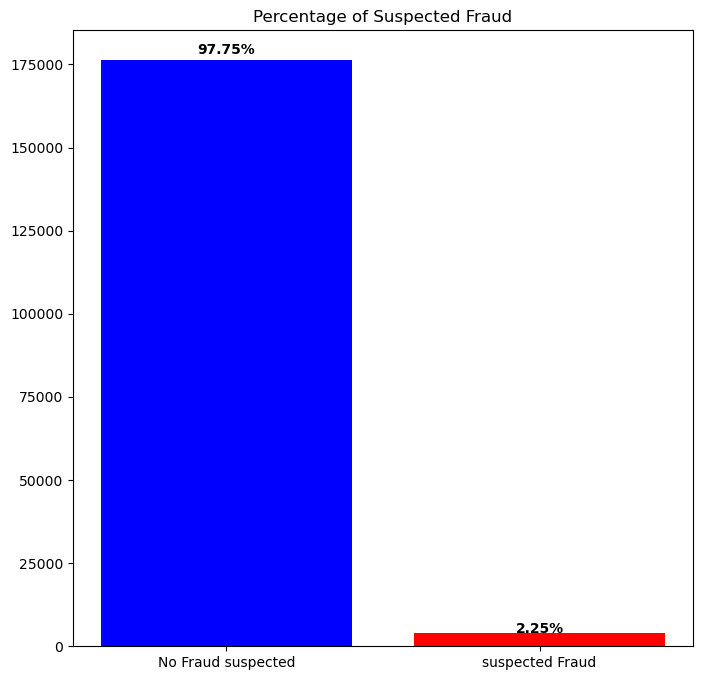

In [41]:
data            =   pd.DataFrame({'Target':['No Fraud suspected','suspected Fraud'],
                     'Count':[176457, 4062]
                    })
 
total_Count     =   180519
# compute percentage of each format
percentage = []
for i in range(data.shape[0]):
    pct = (data.Count[i] / total_Count) * 100
    percentage.append(round(pct,2))
data['Percentage'] = percentage
 
# depict illustration
plt.figure(figsize=(8,8))
colors_list = ['Blue','Red']
graph = plt.bar(data.Target,data.Count, color = colors_list)
plt.title('Percentage of Suspected Fraud')
 
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(data.Percentage[i])+'%',
             ha='center',
             weight='bold')
    i+=1
plt.show()

### Observations

1. Dataset is **highly imbalanced** as the minority class, ** 1** denoting suspected fraud is having around 2.25% of observations while the other class, **'0'** denoting "No fraud" is having the balance of 97.75% of the observations.

2. So, we need to choose the model performance measure carefully to avoid bias to the majority class. 

3. Precision and recall are common metrics used when evaluating classification models for detection of a certain important class. Recall represents how many samples of the important. class was discovered by the model of all the samples in the class, while precision represents the accuracy of predictions for that certain class. In this application, the important class is "Suspected Fraud". True positives is the number of correctly identified data points of the important class, False positives is the number of data points incorrectly identified as important and False negatives is the number of data points incorrectly identified as not important.

We need to remove unwanted variables such as ID variable or that reveals personal information as shown below:
Category Id
Customer Email
Customer Fname
Customer Id
Customer Lname
Customer Password
Department Id
Order Customer Id

In [42]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Fname', 'Customer Id', 'Customer Lname',
       'Customer Segment', 'Customer State', 'Customer Street',
       'Customer Zipcode', 'Department Id', 'Department Name', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Product Card Id', 'Product Category Id', 'Product Name',
       'Product Price', 'Shipping Mode', 'order weekday', 'Target'],
      dtype='object')

In [43]:
df.shape

(180519, 45)

In [44]:
df.drop(columns=['Customer Fname','Department Id','Order Customer Id','Customer Id', 'Customer Lname'],inplace=True)

In [45]:
df.shape

(180519, 40)

In [46]:
## dropping customer zipcode
df.drop('Customer Zipcode',axis=1,inplace=True)

In [47]:
df.shape

(180519, 39)

In [48]:
df.drop(columns=['Order Item Cardprod Id','Product Card Id','Product Category Id','Customer Street'],inplace=True)

In [49]:
df.shape

(180519, 35)

In [50]:
df.drop('Category Id',axis=1,inplace=True)

In [51]:
df.shape

(180519, 34)

In [52]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Segment', 'Customer State',
       'Department Name', 'Market', 'Order City', 'Order Country',
       'order date (DateOrders)', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Order Region',
       'Order State', 'Order Status', 'Product Name', 'Product Price',
       'Shipping Mode', 'order weekday', 'Target'],
      dtype='object')

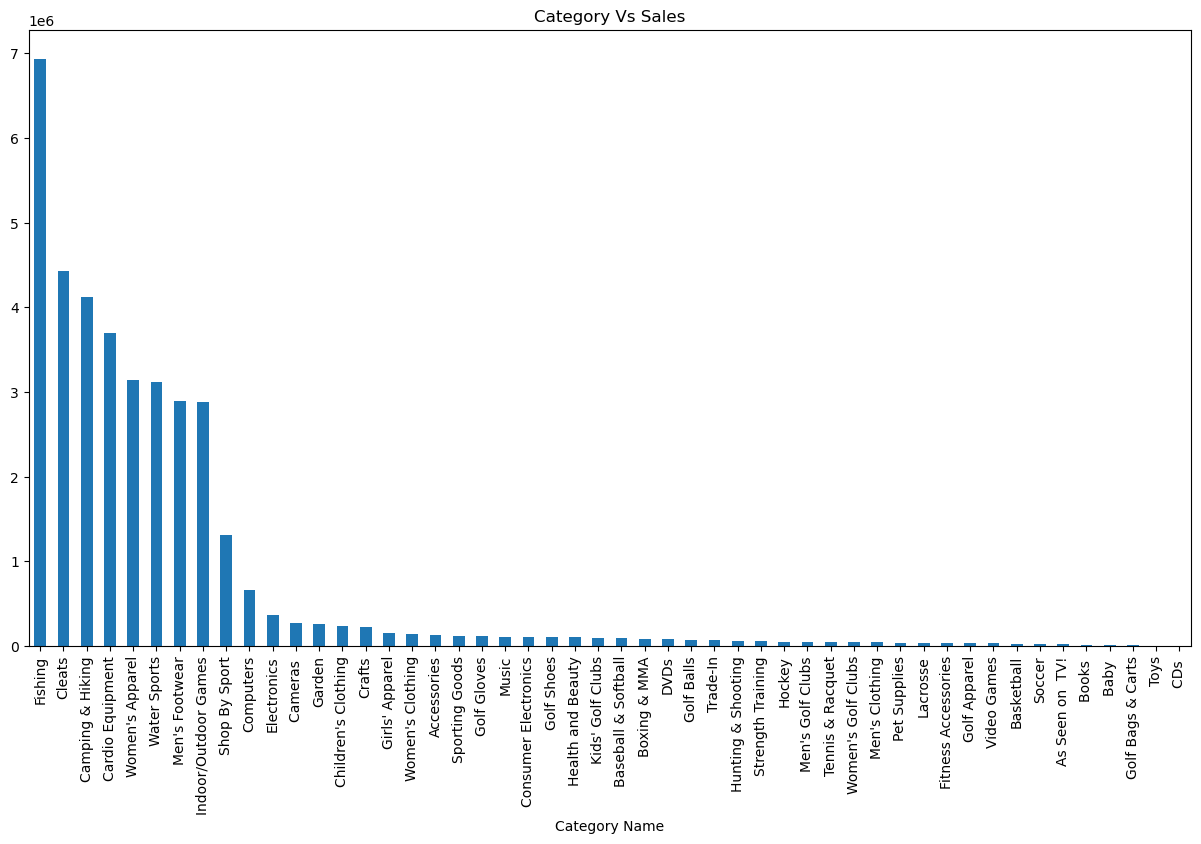

In [53]:
plt.figure(figsize=(15,8))
grouped_data = df.groupby('Category Name')['Sales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title("Category Vs Sales")
plt.show()

Category_Name=df.groupby(['Category Name'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= False)

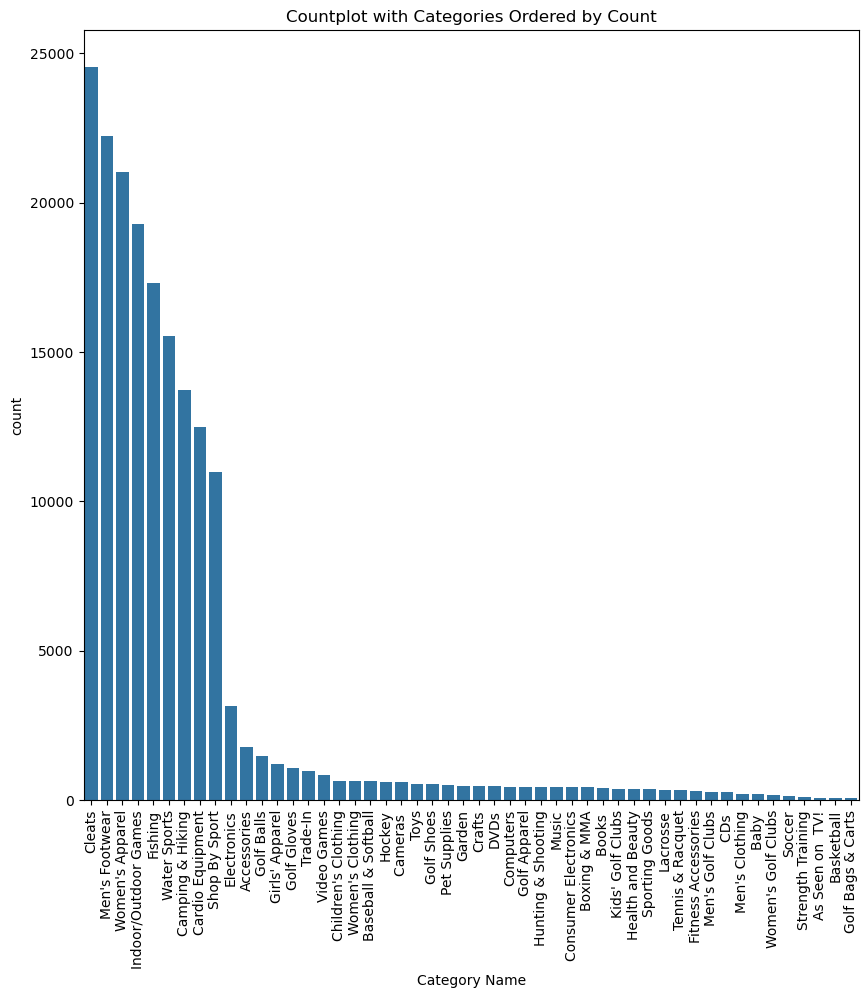

In [54]:
category_counts = df['Category Name'].value_counts()
sns.countplot(x='Category Name', data=df, order=category_counts.index)
plt.title('Countplot with Categories Ordered by Count')
plt.xticks(rotation=90)
plt.show()

* Category Cleats has more number of orders

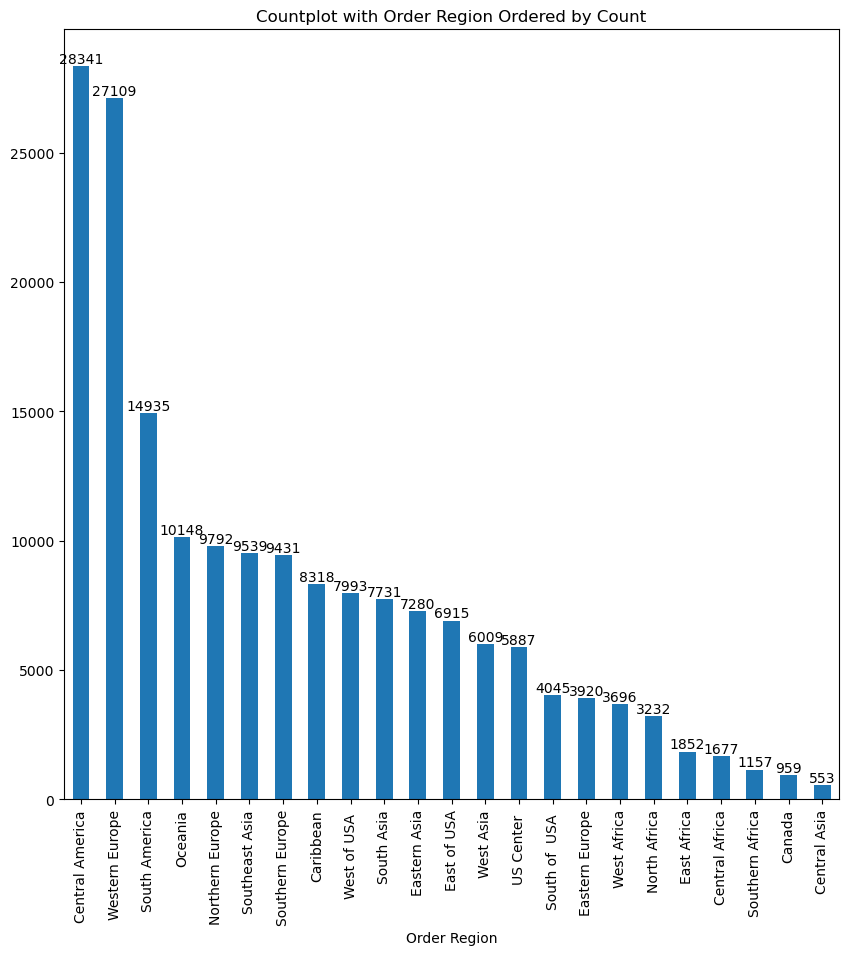

In [55]:
order_region_counts = df['Order Region'].value_counts().plot(kind='bar')
#sns.countplot(x='Order Region', data=df, order=order_region_counts.index)
for p in order_region_counts.patches:
    order_region_counts.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.title('Countplot with Order Region Ordered by Count')
plt.xticks(rotation=90)
plt.show()

* Central America has more number of total orders

In [56]:
## EDA With the target column

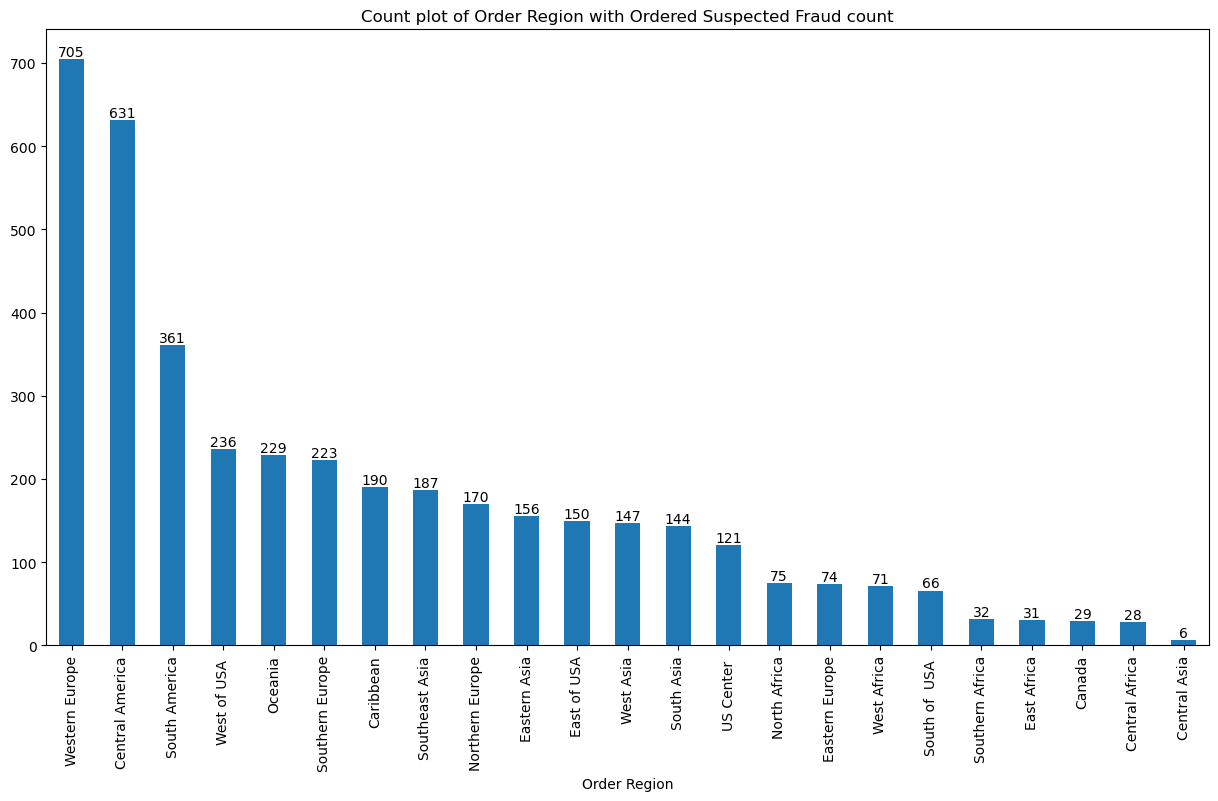

In [57]:
plt.figure(figsize=(15,8))
ax=df[df['Order Status']=='SUSPECTED_FRAUD']['Order Region'].value_counts().plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('Count plot of Order Region with Ordered Suspected Fraud count')
plt.show()

* Western Europe has more of number of suspected fraud orders

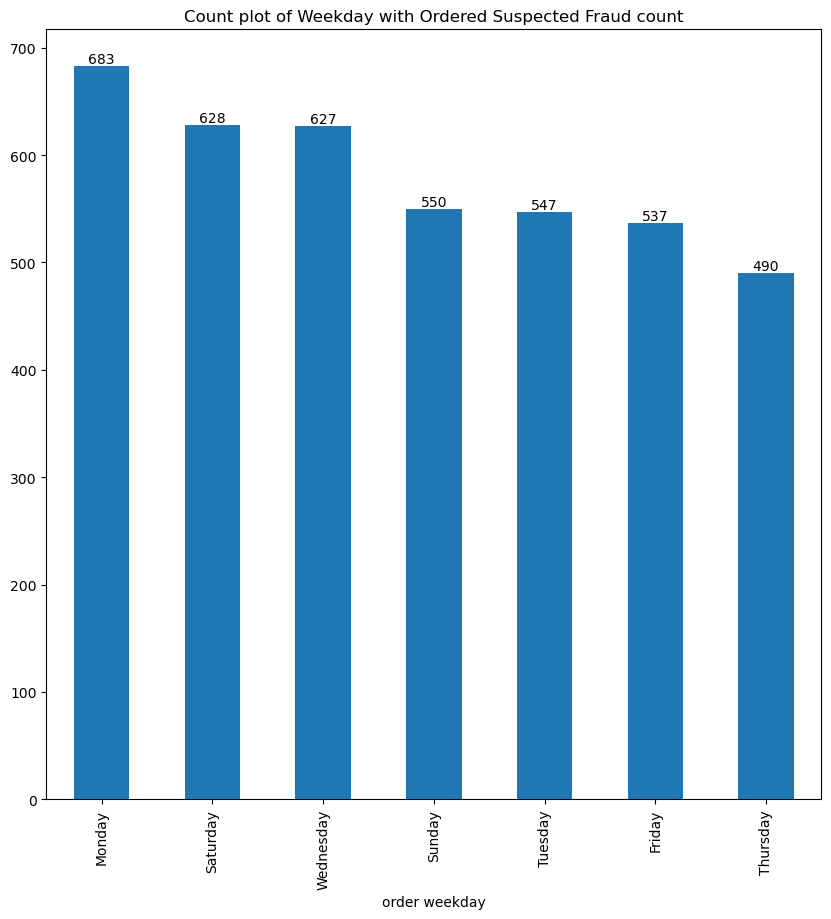

In [58]:
ax=df[df['Order Status']=='SUSPECTED_FRAUD']['order weekday'].value_counts().plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('Count plot of Weekday with Ordered Suspected Fraud count')
plt.show()

In [59]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Segment', 'Customer State',
       'Department Name', 'Market', 'Order City', 'Order Country',
       'order date (DateOrders)', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Order Region',
       'Order State', 'Order Status', 'Product Name', 'Product Price',
       'Shipping Mode', 'order weekday', 'Target'],
      dtype='object')

In [60]:
num=df.select_dtypes(include='number').columns.to_list()
num

['Days for shipping (real)',
 'Days for shipment (scheduled)',
 'Benefit per order',
 'Sales per customer',
 'Order Item Discount',
 'Order Item Discount Rate',
 'Order Item Id',
 'Order Item Product Price',
 'Order Item Profit Ratio',
 'Order Item Quantity',
 'Sales',
 'Order Item Total',
 'Order Profit Per Order',
 'Product Price']

In [61]:
cat=df.select_dtypes(exclude='number').columns.to_list()
cat

['Type',
 'Delivery Status',
 'Late_delivery_risk',
 'Category Name',
 'Customer City',
 'Customer Country',
 'Customer Segment',
 'Customer State',
 'Department Name',
 'Market',
 'Order City',
 'Order Country',
 'order date (DateOrders)',
 'Order Region',
 'Order State',
 'Order Status',
 'Product Name',
 'Shipping Mode',
 'order weekday',
 'Target']

In [62]:
df['order month']=df['order date (DateOrders)'].dt.month
df['order month']

33833     1
77011     1
109322    1
87884     1
114915    1
         ..
160537    1
93905     1
0         1
52147     1
17863     1
Name: order month, Length: 180519, dtype: int32

In [63]:
df[['order date (DateOrders)','order month']]

,order date (DateOrders),order month
33833,2015-01-01 00:00:00,1
77011,2015-01-01 00:21:00,1
109322,2015-01-01 00:21:00,1
87884,2015-01-01 00:21:00,1
114915,2015-01-01 01:03:00,1
...,...,...
160537,2018-01-31 22:14:00,1
93905,2018-01-31 22:35:00,1
0,2018-01-31 22:56:00,1
52147,2018-01-31 23:17:00,1


In [64]:
df['order year']=df['order date (DateOrders)'].dt.year
df['order year']

33833     2015
77011     2015
109322    2015
87884     2015
114915    2015
          ... 
160537    2018
93905     2018
0         2018
52147     2018
17863     2018
Name: order year, Length: 180519, dtype: int32

In [65]:
## dropping the order date column since we have extracted 
df['order month'].dtype,df['order weekday'].dtype,df['order year'].dtype

(dtype('int32'), dtype('O'), dtype('int32'))

* changing the order month and order year to object type for analysis with the target column

In [66]:
lst=['order month','order year']
for i in lst:
    df[i]=df[i].astype('object')

In [67]:
df['order month'].dtype,df['order weekday'].dtype,df['order year'].dtype

(dtype('O'), dtype('O'), dtype('O'))

In [68]:
## dropping the order date column since we have extracted 
df.drop('order date (DateOrders)',axis=1,inplace=True)

In [69]:
#### dropping the order status column as the target column is redefined
df.drop('Order Status',axis=1,inplace=True)

In [70]:
df.shape

(180519, 34)

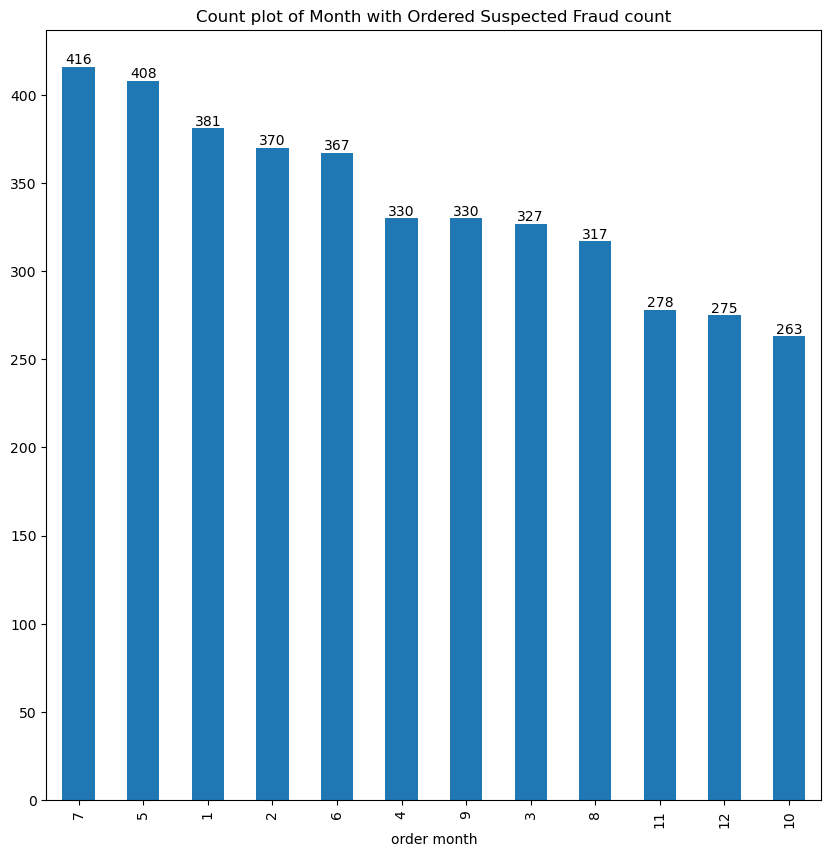

In [71]:
ax=df[df['Target']==1]['order month'].value_counts().plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('Count plot of Month with Ordered Suspected Fraud count')
plt.show()

In [72]:
num=df.select_dtypes(include='number').columns.to_list()
num

['Days for shipping (real)',
 'Days for shipment (scheduled)',
 'Benefit per order',
 'Sales per customer',
 'Order Item Discount',
 'Order Item Discount Rate',
 'Order Item Id',
 'Order Item Product Price',
 'Order Item Profit Ratio',
 'Order Item Quantity',
 'Sales',
 'Order Item Total',
 'Order Profit Per Order',
 'Product Price']

In [73]:
cat=df.select_dtypes(include='object').columns.to_list()
cat

['Type',
 'Delivery Status',
 'Late_delivery_risk',
 'Category Name',
 'Customer City',
 'Customer Country',
 'Customer Segment',
 'Customer State',
 'Department Name',
 'Market',
 'Order City',
 'Order Country',
 'Order Region',
 'Order State',
 'Product Name',
 'Shipping Mode',
 'order weekday',
 'Target',
 'order month',
 'order year']

In [74]:
for i in cat:
    print(df[i].value_counts())
    #df[i].value_counts().plot(kind='bar')
    #plt.show()
    print('****************************************')

Type
DEBIT       69295
TRANSFER    49883
PAYMENT     41725
CASH        19616
Name: count, dtype: int64
****************************************
Delivery Status
Late delivery        98977
Advance shipping     41592
Shipping on time     32196
Shipping canceled     7754
Name: count, dtype: int64
****************************************
Late_delivery_risk
1    98977
0    81542
Name: count, dtype: int64
****************************************
Category Name
Cleats                  24551
Men's Footwear          22246
Women's Apparel         21035
Indoor/Outdoor Games    19298
Fishing                 17325
Water Sports            15540
Camping & Hiking        13729
Cardio Equipment        12487
Shop By Sport           10984
Electronics              3156
Accessories              1780
Golf Balls               1475
Girls' Apparel           1201
Golf Gloves              1070
Trade-In                  974
Video Games               838
Children's Clothing       652
Women's Clothing          650
Bas

In [75]:

df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Segment', 'Customer State',
       'Department Name', 'Market', 'Order City', 'Order Country',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Product Name',
       'Product Price', 'Shipping Mode', 'order weekday', 'Target',
       'order month', 'order year'],
      dtype='object')

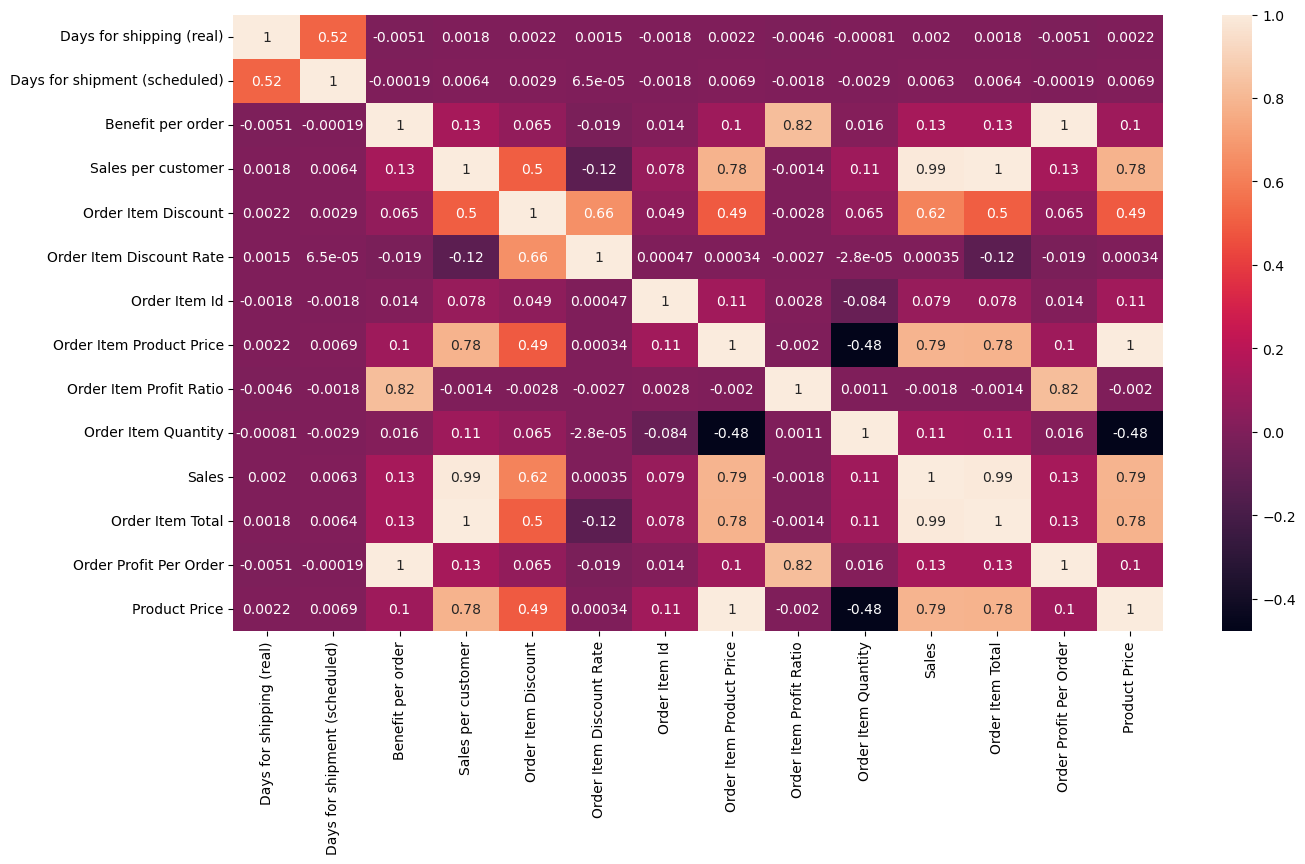

In [76]:
plt.figure(figsize=(15,8))
sns.heatmap(df[num].corr(),annot=True)
plt.show()

* There is not very good muticollinearity exists in numerical data

In [77]:
### Statistical analysis for categorical columns
cat

['Type',
 'Delivery Status',
 'Late_delivery_risk',
 'Category Name',
 'Customer City',
 'Customer Country',
 'Customer Segment',
 'Customer State',
 'Department Name',
 'Market',
 'Order City',
 'Order Country',
 'Order Region',
 'Order State',
 'Product Name',
 'Shipping Mode',
 'order weekday',
 'Target',
 'order month',
 'order year']

In [78]:
from scipy import stats

In [79]:
obs=pd.crosstab(df['Target'],df['Type'])
obs

Type,CASH,DEBIT,PAYMENT,TRANSFER
Target,,,,
0,19616,69295,41725,45821
1,0,0,0,4062


In [80]:
def test_relation(cat):
    print('Ho: There is no relationship among the Target and ', cat,' column')
    print('Ha: There is relationship among the Target and ',cat,' column')
    obs=pd.crosstab(df['Target'],df[cat])
    
    stat,pval,dof,exp=stats.chi2_contingency(obs)
    sigval=0.05
    print('statistic value -- ',stat,'\npvalue -- ',pval)
    if pval < 0.05:
        print('reject Ho,hence There is relationship among the Target and ', cat,' column')
    else:
        print('fail to reject ho,hence There is no relationship among the Target and ',cat,' column')
    print('--------------------------------------------------------------------------------------------------------')

In [81]:
test_relation('Type')

Ho: There is no relationship among the Target and  Type  column
Ha: There is relationship among the Target and  Type  column
statistic value --  10882.639839127365 
pvalue --  0.0
reject Ho,hence There is relationship among the Target and  Type  column
--------------------------------------------------------------------------------------------------------


In [82]:
for i in cat:
    test_relation(i)

Ho: There is no relationship among the Target and  Type  column
Ha: There is relationship among the Target and  Type  column
statistic value --  10882.639839127365 
pvalue --  0.0
reject Ho,hence There is relationship among the Target and  Type  column
--------------------------------------------------------------------------------------------------------
Ho: There is no relationship among the Target and  Delivery Status  column
Ha: There is relationship among the Target and  Delivery Status  column
statistic value --  92587.83191660802 
pvalue --  0.0
reject Ho,hence There is relationship among the Target and  Delivery Status  column
--------------------------------------------------------------------------------------------------------
Ho: There is no relationship among the Target and  Late_delivery_risk  column
Ha: There is relationship among the Target and  Late_delivery_risk  column
statistic value --  5041.756332453087 
pvalue --  0.0
reject Ho,hence There is relationship among t

#### columns with no relationship
* Category Name
* Department Name
* Market column
* Product Name
* order year


In [83]:
## dropping these category columns
df.drop(columns=['Category Name','Department Name','Market','Product Name','order year'],inplace=True)

In [84]:
def cat_cols(df):
    cat=df.select_dtypes(include='object').columns.to_list()
    return cat

In [85]:
df[df['Target']==1]['Customer Segment'].value_counts()

Customer Segment
Consumer       2215
Corporate      1132
Home Office     715
Name: count, dtype: int64

In [86]:
pd.DataFrame(df['Order City'].unique(),columns=['Order City'])

,Order City
0,Mexico City
1,Dos Quebradas
2,São Paulo
3,Managua
4,Brasília
...,...
3592,Shahjahanpur
3593,Penglai
3594,Gujrat
3595,Jiaohe


In [87]:
list1=df['Order Country'].unique()
pd.DataFrame(df['Order Country'].unique(),columns=['Order Country'])

,Order Country
0,México
1,Colombia
2,Brasil
3,Nicaragua
4,Panamá
...,...
159,Baréin
160,Serbia
161,Chad
162,Burundi


In [88]:
pd.DataFrame(df['Order Region'].unique(),columns=['Order Region'])

,Order Region
0,Central America
1,South America
2,Caribbean
3,Northern Europe
4,Western Europe
5,Southern Europe
6,Eastern Asia
7,Southeast Asia
8,Oceania
9,South Asia


In [89]:
pd.DataFrame(df['Order State'].unique(),columns=['Order State'])

,Order State
0,Distrito Federal
1,Risaralda
2,São Paulo
3,Managua
4,Panamá
...,...
1084,Kastamonu
1085,Yevrey
1086,Kars
1087,Jizzakh


* Dropping the Order City and Order State, since it has more  unique values,encoding that will lead to over fit of model
* Retaining the Order Country and Order Region

In [90]:
df.drop(columns=['Order City','Order State'],inplace=True)

In [91]:
cat_cols(df)

['Type',
 'Delivery Status',
 'Late_delivery_risk',
 'Customer City',
 'Customer Country',
 'Customer Segment',
 'Customer State',
 'Order Country',
 'Order Region',
 'Shipping Mode',
 'order weekday',
 'Target',
 'order month']

In [92]:
pd.DataFrame(df['Customer Country'].unique(),columns=['Customer Country'])

,Customer Country
0,EE. UU.
1,Puerto Rico


In [93]:
pd.DataFrame(df['Customer City'].unique(),columns=['Customer City'])

,Customer City
0,Hickory
1,Chicago
2,San Antonio
3,Caguas
4,Miami
...,...
558,Hollister
559,Longview
560,Spring
561,Stafford


In [94]:
pd.DataFrame(df['Customer State'].unique(),columns=['Customer State'])

,Customer State
0,NC
1,IL
2,TX
3,PR
4,FL
5,OH
6,TN
7,CA
8,KY
9,NY


* Dropping  Customer city,Retaining Customer State and Customer Country

In [95]:
df.drop(columns=['Customer City'],inplace=True)

In [96]:
df.shape

(180519, 26)

In [97]:
## Encoding the categorical columns
cat_cols(df)

['Type',
 'Delivery Status',
 'Late_delivery_risk',
 'Customer Country',
 'Customer Segment',
 'Customer State',
 'Order Country',
 'Order Region',
 'Shipping Mode',
 'order weekday',
 'Target',
 'order month']

In [98]:
cat=['Type',
 'Delivery Status',
 'Late_delivery_risk',
 'Customer Country',
 'Customer Segment',
 'Customer State',
 'Order Country',
 'Order Region',
 'Shipping Mode',
 'order weekday',
 'Target',
 'order month']

In [99]:
df['Delivery Status'].value_counts()

Delivery Status
Late delivery        98977
Advance shipping     41592
Shipping on time     32196
Shipping canceled     7754
Name: count, dtype: int64

In [100]:
df['Type'].value_counts()

Type
DEBIT       69295
TRANSFER    49883
PAYMENT     41725
CASH        19616
Name: count, dtype: int64

In [101]:
from sklearn.preprocessing import *

In [102]:
le=LabelEncoder()

In [103]:
df['Type']=le.fit_transform(df['Type'])
df['Type']

33833     0
77011     2
109322    2
87884     2
114915    0
         ..
160537    3
93905     1
0         1
52147     2
17863     0
Name: Type, Length: 180519, dtype: int32

In [104]:
df['Type'].value_counts()

Type
1    69295
3    49883
2    41725
0    19616
Name: count, dtype: int64

In [105]:
## LAbel encoding , 
lst=['Customer Country',
 'Customer Segment',
 'Customer State',
 'Order Country',
 'Order Region']
lst

['Customer Country',
 'Customer Segment',
 'Customer State',
 'Order Country',
 'Order Region']

In [106]:
for k in lst:
    df[k]=le.fit_transform(df[k])

In [107]:
df[lst]

,Customer Country,Customer Segment,Customer State,Order Country,Order Region
33833,0,0,26,102,3
77011,0,0,15,33,12
109322,0,0,15,33,12
87884,0,0,15,33,12
114915,0,2,40,33,12
...,...,...,...,...,...
160537,1,0,36,70,15
93905,0,0,15,70,15
0,1,0,36,70,15
52147,0,1,15,70,15


In [108]:
## changing the type of late delivery risk to int
df['Late_delivery_risk']=df['Late_delivery_risk'].astype('int')

In [109]:
## encoding the Delivery status column
df['Delivery Status'].replace({'Late delivery':2,'Advance shipping':0,'Shipping on time':1,'Shipping canceled':3 },inplace=True)

In [110]:
df['Delivery Status'].value_counts()

Delivery Status
2    98977
0    41592
1    32196
3     7754
Name: count, dtype: int64

In [111]:
df['Shipping Mode'].value_counts()

Shipping Mode
Standard Class    107752
Second Class       35216
First Class        27814
Same Day            9737
Name: count, dtype: int64

In [112]:
oe=OrdinalEncoder(categories=[['Same Day','First Class','Second Class','Standard Class']])
df['Shipping Mode']=oe.fit_transform(df[['Shipping Mode']])

In [113]:
df['Shipping Mode'].value_counts()

Shipping Mode
3.0    107752
2.0     35216
1.0     27814
0.0      9737
Name: count, dtype: int64

In [114]:
df['order weekday'].value_counts()

order weekday
Sunday       25946
Friday       25925
Saturday     25901
Monday       25786
Thursday     25752
Tuesday      25622
Wednesday    25587
Name: count, dtype: int64

In [115]:
oe=OrdinalEncoder(categories=[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']])
df['order weekday']=oe.fit_transform(df[['order weekday']])

In [116]:
df['order weekday'].value_counts()

order weekday
6.0    25946
4.0    25925
5.0    25901
0.0    25786
3.0    25752
1.0    25622
2.0    25587
Name: count, dtype: int64

In [117]:
df['order month'].value_counts()

order month
1     17979
5     15976
7     15922
3     15919
8     15912
9     15489
4     15435
6     15139
2     14529
10    12955
12    12764
11    12500
Name: count, dtype: int64

In [118]:
## Changing the datatype of order month to int
df['order month']=df['order month'].astype(int)

In [119]:
df[cat]

,Type,Delivery Status,Late_delivery_risk,Customer Country,Customer Segment,Customer State,Order Country,Order Region,Shipping Mode,order weekday,Target,order month
33833,0,0,0,0,0,26,102,3,3.0,3.0,0,1
77011,2,0,0,0,0,15,33,12,3.0,3.0,0,1
109322,2,0,0,0,0,15,33,12,3.0,3.0,0,1
87884,2,0,0,0,0,15,33,12,3.0,3.0,0,1
114915,0,2,1,0,2,40,33,12,3.0,3.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
160537,3,2,1,1,0,36,70,15,3.0,2.0,0,1
93905,1,0,0,0,0,15,70,15,3.0,2.0,0,1
0,1,0,0,1,0,36,70,15,3.0,2.0,0,1
52147,2,1,0,0,1,15,70,15,3.0,2.0,0,1


In [120]:
df['Target']=df['Target'].astype(int)

In [121]:
### All the cat columns is encoded

In [122]:
num

['Days for shipping (real)',
 'Days for shipment (scheduled)',
 'Benefit per order',
 'Sales per customer',
 'Order Item Discount',
 'Order Item Discount Rate',
 'Order Item Id',
 'Order Item Product Price',
 'Order Item Profit Ratio',
 'Order Item Quantity',
 'Sales',
 'Order Item Total',
 'Order Profit Per Order',
 'Product Price']

In [123]:
##Dropping the OrderItem Id column
df.drop('Order Item Id',axis=1,inplace=True)

In [124]:
num=['Days for shipping (real)',
 'Days for shipment (scheduled)',
 'Benefit per order',
 'Sales per customer',
 'Order Item Discount',
 'Order Item Discount Rate',
 'Order Item Product Price',
 'Order Item Profit Ratio',
 'Order Item Quantity',
 'Sales',
 'Order Item Total',
 'Order Profit Per Order',
 'Product Price']

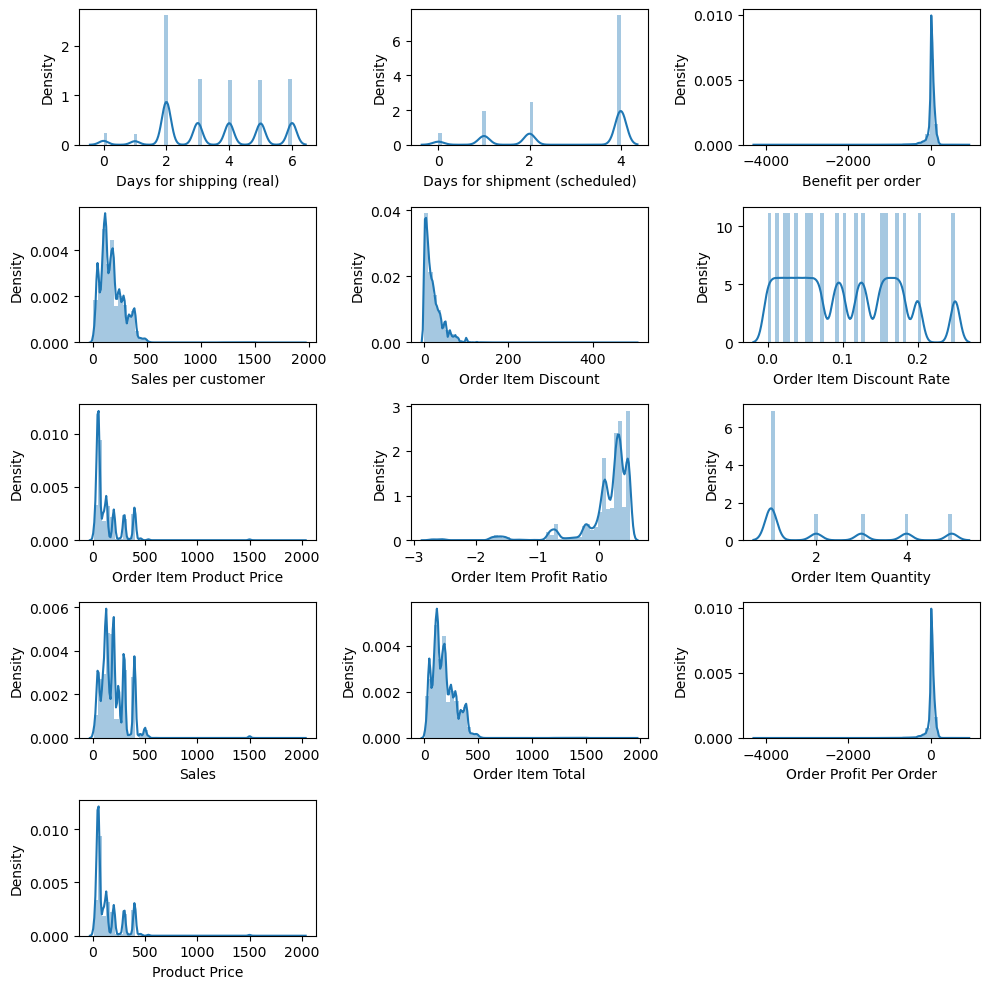

In [125]:
t=1
for i in num:
    plt.rcParams['figure.figsize']=[10,10]
    plt.subplot(5,3,t)
    sns.distplot(df[i])
    t+=1
plt.tight_layout()
plt.show()

In [126]:
df[num].skew()

Days for shipping (real)         0.084771
Days for shipment (scheduled)   -0.731998
Benefit per order               -4.741834
Sales per customer               2.888446
Order Item Discount              3.039796
Order Item Discount Rate         0.340928
Order Item Product Price         3.191020
Order Item Profit Ratio         -2.893531
Order Item Quantity              0.880252
Sales                            2.884249
Order Item Total                 2.888446
Order Profit Per Order          -4.741834
Product Price                    3.191020
dtype: float64

In [127]:
##other then the Days for shipping(real) and Days for shipping(scheduled)
## perform yeojohnson
trans_col=['Benefit per order',
 'Sales per customer',
 'Order Item Discount',
 'Order Item Discount Rate',
 'Order Item Product Price',
 'Order Item Profit Ratio',
 'Order Item Quantity',
 'Sales',
 'Order Item Total',
 'Order Profit Per Order',
 'Product Price']

In [128]:
    df[trans_col]

,Benefit per order,Sales per customer,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Price
33833,88.790001,239.979996,60.000000,0.20,299.980011,0.37,1,299.980011,239.979996,88.790001,299.980011
77011,91.180000,193.990005,6.000000,0.03,199.990005,0.47,1,199.990005,193.990005,91.180000,199.990005
109322,68.250000,227.500000,22.500000,0.09,50.000000,0.30,5,250.000000,227.500000,68.250000,50.000000
87884,36.470001,107.889999,22.100000,0.17,129.990005,0.34,1,129.990005,107.889999,36.470001,129.990005
114915,33.590000,159.940002,39.980000,0.20,49.980000,0.21,4,199.919998,159.940002,33.590000,49.980000
...,...,...,...,...,...,...,...,...,...,...,...
160537,-107.959999,161.869995,53.959999,0.25,215.820007,-0.67,1,215.820007,161.869995,-107.959999,215.820007
93905,-126.559998,172.660004,43.160000,0.20,215.820007,-0.73,1,215.820007,172.660004,-126.559998,215.820007
0,91.250000,314.640015,13.110000,0.04,327.750000,0.29,1,327.750000,314.640015,91.250000,327.750000
52147,1.530000,10.910000,0.630000,0.06,11.540000,0.14,1,11.540000,10.910000,1.530000,11.540000


In [129]:
py=PowerTransformer()
df[trans_col]=py.fit_transform(df[trans_col])

In [130]:
df[trans_col]

,Benefit per order,Sales per customer,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Price
33833,0.848487,0.668831,1.544629,1.334254,1.290479,0.684560,-0.873910,0.876392,0.668831,0.848487,1.290479
77011,0.891560,0.311516,-0.643080,-1.046923,0.883882,1.362934,-0.873910,0.184232,0.311516,0.891560,0.883882
109322,0.485193,0.576981,0.465156,-0.065867,-0.754376,0.283894,1.487999,0.554553,0.576981,0.485193,-0.754376
87884,-0.046263,-0.563135,0.447527,0.994952,0.417382,0.505772,-0.873910,-0.462294,-0.563135,-0.046263,0.417382
114915,-0.091985,0.006535,1.069681,1.334254,-0.754908,-0.151073,1.307858,0.183671,0.006535,-0.091985,-0.754908
...,...,...,...,...,...,...,...,...,...,...,...
160537,-1.198344,0.024977,1.416513,1.841502,0.962613,-1.748034,-0.873910,0.307773,0.024977,-1.198344,0.962613
93905,-1.292453,0.125342,1.156095,1.334254,0.962613,-1.784232,-0.873910,0.307773,0.125342,-1.292453,0.962613
0,0.892824,1.158018,-0.034047,-0.870368,1.375277,0.231270,-0.873910,1.039360,1.158018,0.892824,1.375277
52147,-0.547788,-2.793913,-1.669374,-0.533545,-2.934624,-0.433328,-0.873910,-2.831475,-2.793913,-0.547788,-2.934624


In [131]:
df[trans_col].skew()

Benefit per order           1.508880
Sales per customer          0.017112
Order Item Discount        -0.041690
Order Item Discount Rate    0.055382
Order Item Product Price    0.037677
Order Item Profit Ratio    -0.281849
Order Item Quantity         0.384059
Sales                       0.018769
Order Item Total            0.017112
Order Profit Per Order      1.508880
Product Price               0.037677
dtype: float64

* The skewness is reduced

In [132]:
df.shape

(180519, 25)

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180519 entries, 33833 to 17863
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  int32  
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  int64  
 6   Late_delivery_risk             180519 non-null  int32  
 7   Customer Country               180519 non-null  int32  
 8   Customer Segment               180519 non-null  int32  
 9   Customer State                 180519 non-null  int32  
 10  Order Country                  180519 non-null  int32  
 11  Order Item Discount            180519 non-null  float64
 12  Order Item Discount Rate       1

In [134]:
## Segregating the independent and dependent columns

In [135]:
x=df.drop('Target',axis=1)
y=df['Target']

In [136]:
from sklearn.model_selection import *
from imblearn.over_sampling import SMOTE

In [137]:
from sklearn.metrics import *

In [138]:
#Split Data into Training and Testing Sets:
##Python
xtrain,xtest,ytrain,ytest= train_test_split(x, y, test_size=0.3, random_state=42)   


#Apply SMOTE:
sm = SMOTE(random_state=42)
xtrain_res,ytrain_res = sm.fit_resample(xtrain, ytrain)



# Example with Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain_res,ytrain_res)


## Model Prediction
ypred = model.predict(xtest)
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     35266
           1       0.53      1.00      0.69       838

    accuracy                           0.98     36104
   macro avg       0.76      0.99      0.84     36104
weighted avg       0.99      0.98      0.98     36104



In [139]:
ypred = model.predict(xtrain)
print(classification_report(ytrain, ypred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    141191
           1       0.52      1.00      0.68      3224

    accuracy                           0.98    144415
   macro avg       0.76      0.99      0.84    144415
weighted avg       0.99      0.98      0.98    144415



In [140]:
xtrain,xtest,ytrain,ytest= train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)   

# Example with Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain,ytrain)

## Model Prediction
ypred = model.predict(xtest)
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     35292
           1       0.52      0.57      0.55       812

    accuracy                           0.98     36104
   macro avg       0.76      0.78      0.77     36104
weighted avg       0.98      0.98      0.98     36104



In [150]:
mod = []
acc = []
pre = []
rec = []
f1 = []
ck = []
tit=[]
def model_validation(title,model,xtrain,ytrain,xtest,ytest):
    m = model
    m.fit(xtrain,ytrain)
    hard = m.predict(xtest)
    soft = m.predict_proba(xtest)[:,1]

    print('classification Report\n',classification_report(ytest,hard))
    fpr,tpr,th = roc_curve(ytest,soft)
    plt.title(f'ROC AUC: {round(roc_auc_score(ytest,soft),3)}')
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1],ls='--',color='red')
    plt.show()

    inp = input('Do you want to save the model in score card? Y/N')
    if inp.lower()=='y':
        global scorecard
        tit.append(title)
        mod.append(str(model))
        acc.append(accuracy_score(ytest,hard))
        pre.append(precision_score(ytest,hard))
        rec.append(recall_score(ytest,hard))
        f1.append(f1_score(ytest,hard))
        ck.append(cohen_kappa_score(ytest,hard))
        
        scorecard = pd.DataFrame({'Title':tit,
                                  'Model':mod,
                                  'Accuracy':acc,
                                   'Precision':pre,
                                  'Recall':rec,
                                    'F1 Score':f1,
                                    'Cohen Kappa':ck})
    else:
        return


classification Report
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     35292
           1       0.52      0.57      0.55       812

    accuracy                           0.98     36104
   macro avg       0.76      0.78      0.77     36104
weighted avg       0.98      0.98      0.98     36104



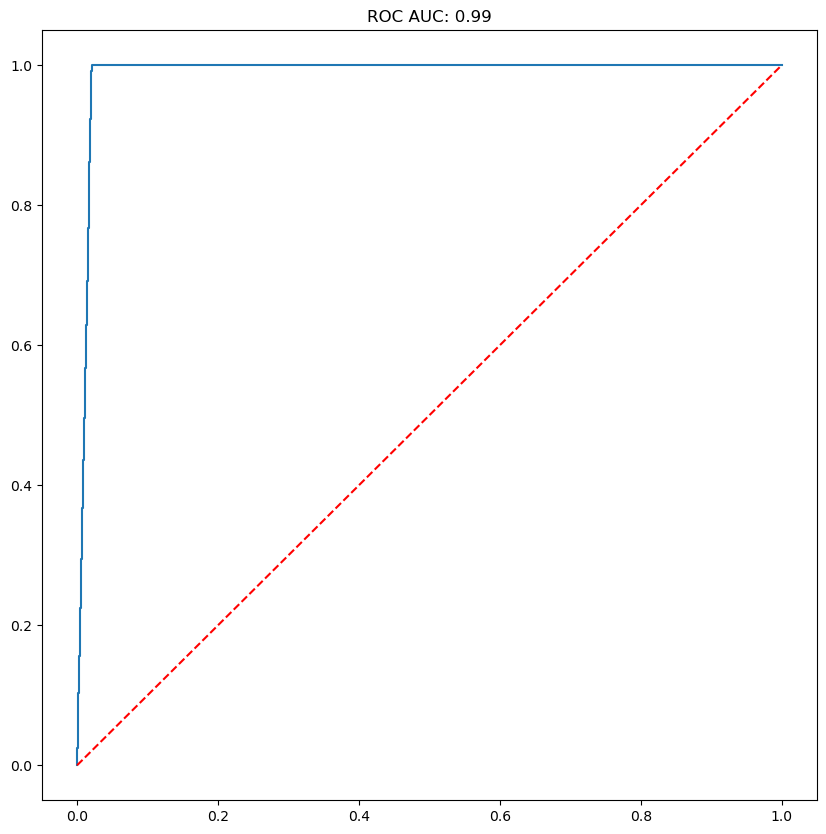

Do you want to save the model in score card? Y/NY


In [151]:
model_validation('LogisticRegression_without_smote',LogisticRegression(),xtrain,ytrain,xtest,ytest)

In [152]:
scorecard

,Title,Model,Accuracy,Precision,Recall,F1 Score,Cohen Kappa
0,LogisticRegression_without_smote,LogisticRegression(),0.978507,0.520134,0.57266,0.545135,0.534154


classification Report
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     35292
           1       0.52      1.00      0.69       812

    accuracy                           0.98     36104
   macro avg       0.76      0.99      0.84     36104
weighted avg       0.99      0.98      0.98     36104



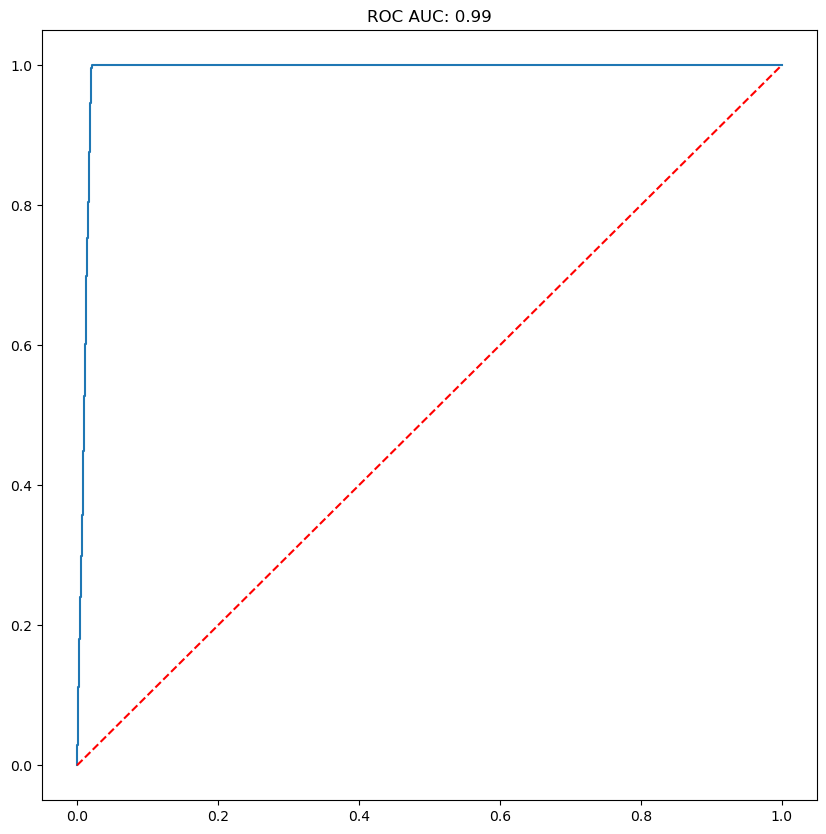

Do you want to save the model in score card? Y/NY


In [153]:
model_validation('LogisticRegression_with_smote',LogisticRegression(),xtrain_res,ytrain_res,xtest,ytest)

In [154]:
scorecard

,Title,Model,Accuracy,Precision,Recall,F1 Score,Cohen Kappa
0,LogisticRegression_without_smote,LogisticRegression(),0.978507,0.520134,0.57266,0.545135,0.534154
1,LogisticRegression_with_smote,LogisticRegression(),0.979476,0.522859,1.00000,0.686681,0.677144
